In [2]:
import importlib
import itertools
import numpy as np

import visualizers
from geometric_types import Point
import kd_tree as kd_tree_module
from quadtree import Quadtree
importlib.reload(visualizers)
importlib.reload(kd_tree_module)

def conv_to_np_float64_points(points: list[list]) -> list[Point]:
    new_points = []
    for p in points:
        new_points.append(list(map(np.float64, p)))

    return new_points

A, B = (0, 0), (100, 100)

<IPython.core.display.Javascript object>


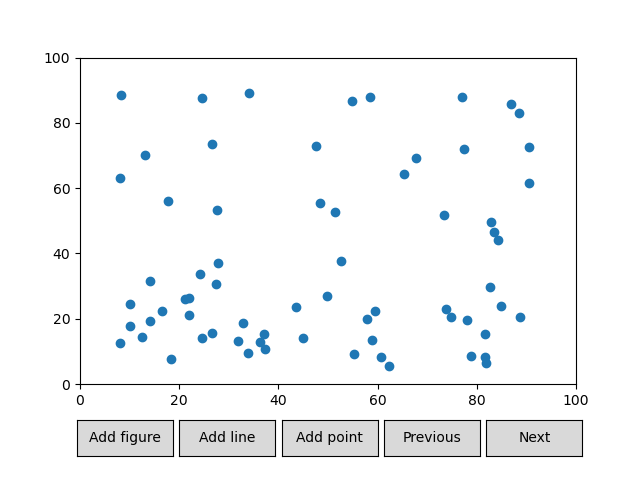

(0.0, 100.0)

In [3]:

%matplotlib notebook

input_plot = visualizers.Plot()
input_plot.draw()
ax = visualizers.plt.gca()
ax.set_xlim((A[0], B[0]))
ax.set_ylim((A[1], B[1]))

## Reset input points

In [4]:
inp_points = []

## Get input points from plot above

In [7]:
inp_points = [*inp_points, *itertools.chain(*map(lambda coll: coll.points, input_plot.get_added_points()))]

## KD-Tree

### Build KD-Tree
<font color="blue">blue lines</font> - dividing lines <br>
<font color="black">black points</font> - input points

<IPython.core.display.Javascript object>


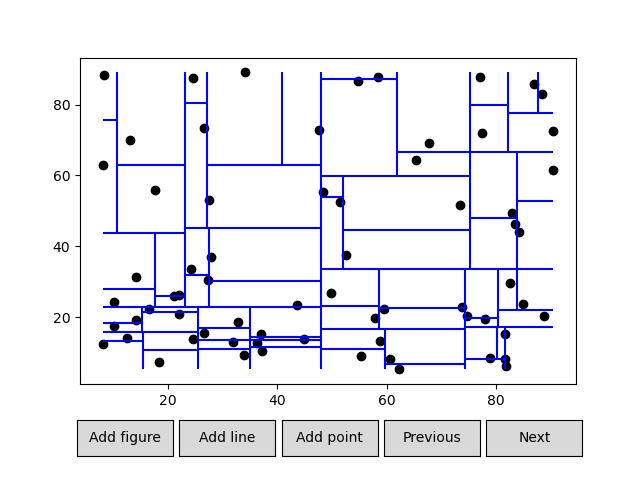

In [13]:
kd_tree = kd_tree_module.KDTree(2, conv_to_np_float64_points(inp_points), True)

if kd_tree.visualizer is not None:
    tree_build_plot = kd_tree.visualizer.get_tree_building_plot()
    tree_build_plot.draw()

### Query KD-Tree
<font color="black">black points</font> - points contained in the kd-tree <br>
<font color="orange">orange points</font> - found points <br>
<font color="green">green rectangle</font> - area of the current kd-tree node <br>
<font color="red">red rectangle</font> - searched area <br>


[[21.969506048387093, 21.03439031862744], [26.606602822580644, 15.519684436274499], [32.85660282258064, 18.583409926470576], [37.09047379032258, 15.213311887254893], [21.16305443548387, 25.93635110294117], [21.969506048387093, 26.242723651960777], [43.542086693548384, 23.485370710784306], [49.792086693548384, 26.85546874999999]]


<IPython.core.display.Javascript object>


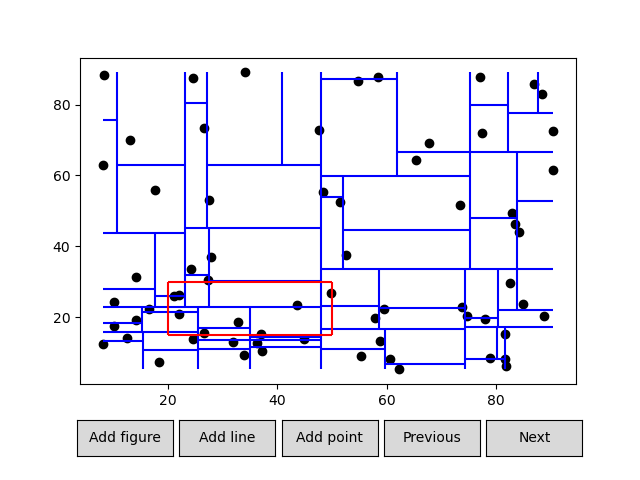

In [9]:
print(kd_tree.find_points_in_area(([np.float64(20), np.float64(15)], [np.float64(50), np.float64(30)])))
if kd_tree.visualizer is not None:
    res_plot = kd_tree.visualizer.get_searching_plot()
    res_plot.draw()

## Quadtree

### Build Quadtree

<IPython.core.display.Javascript object>


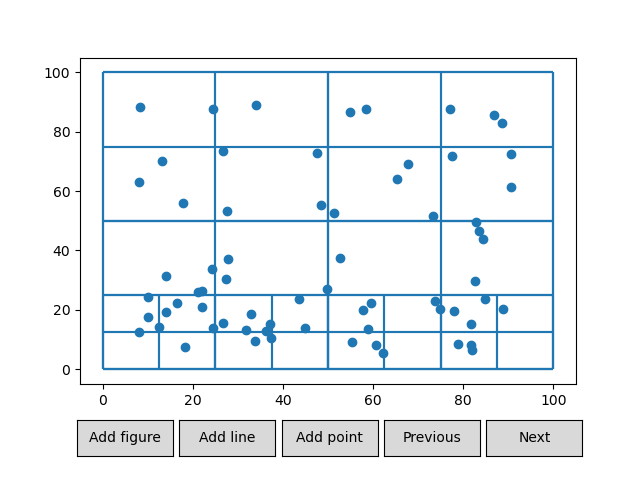

In [12]:
quadtree = Quadtree(inp_points, (A, B), 4, True)

build_plot = quadtree.visualizer.create_build_plot()
build_plot.draw()

### Query QuadTree
<font color="blue">blue points</font> - points contained in the quadtree <br>
<font color="green">green rectangle</font> - searched area <br>
<font color="green">green points</font> - found points <br>
<font color="red">red rectangle</font> - area of the current node <br>
<font color="red">red points</font> - points found in the searched area in current node <br>

(60.679183467741936, 8.166743259803912)
(81.64692540322581, 8.166743259803912)
(81.64692540322581, 15.213311887254893)
(81.84853830645162, 6.328507965686267)
(78.01789314516128, 19.502527573529402)
(78.82434475806451, 8.473115808823518)
(62.292086693548384, 5.409390318627441)
(57.85660282258064, 19.80890012254901)
(58.86466733870968, 13.375076593137248)
(55.23563508064517, 9.085860906862738)
(10.074344758064516, 17.664292279411757)
(33.86466733870968, 9.392233455882344)
(32.85660282258064, 18.583409926470576)
(44.953377016129025, 13.98782169117646)
(36.284022177419345, 12.762331495098028)
(31.848538306451612, 13.068704044117634)
(26.606602822580644, 15.519684436274499)
(37.09047379032258, 15.213311887254893)
(37.292086693548384, 10.617723651960777)
(12.493699596774192, 14.294194240196067)
(14.106602822580644, 19.196155024509796)
(8.058215725806452, 12.455958946078422)
(18.34047379032258, 7.553998161764692)
(24.59047379032258, 13.98782169117646)


<IPython.core.display.Javascript object>


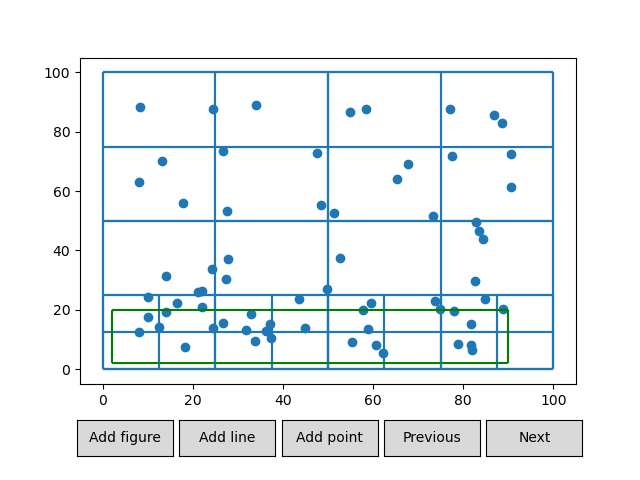

In [11]:
boundary = ((2, 2), (90, 20))
[print(point) for point in quadtree.query_range(boundary)]

query_plot = quadtree.visualizer.create_query_plot()
query_plot.draw()